In [1]:
import pandas as pd 
import requests 
from bs4 import BeautifulSoup

In [42]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
webpage=requests.get('https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page=1',headers=headers).text

In [43]:
soup=BeautifulSoup(webpage,"lxml")

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script async="" src="https://www.googletagmanager.com/gtag/js">
  </script>
  <script>
   window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)
  </script>
  <title>
   List of companies in India | AmbitionBox
  </title>
  <meta content="2023 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>
  <meta content="EN" data-n-head="ssr" name="content-language"/>
  <meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/
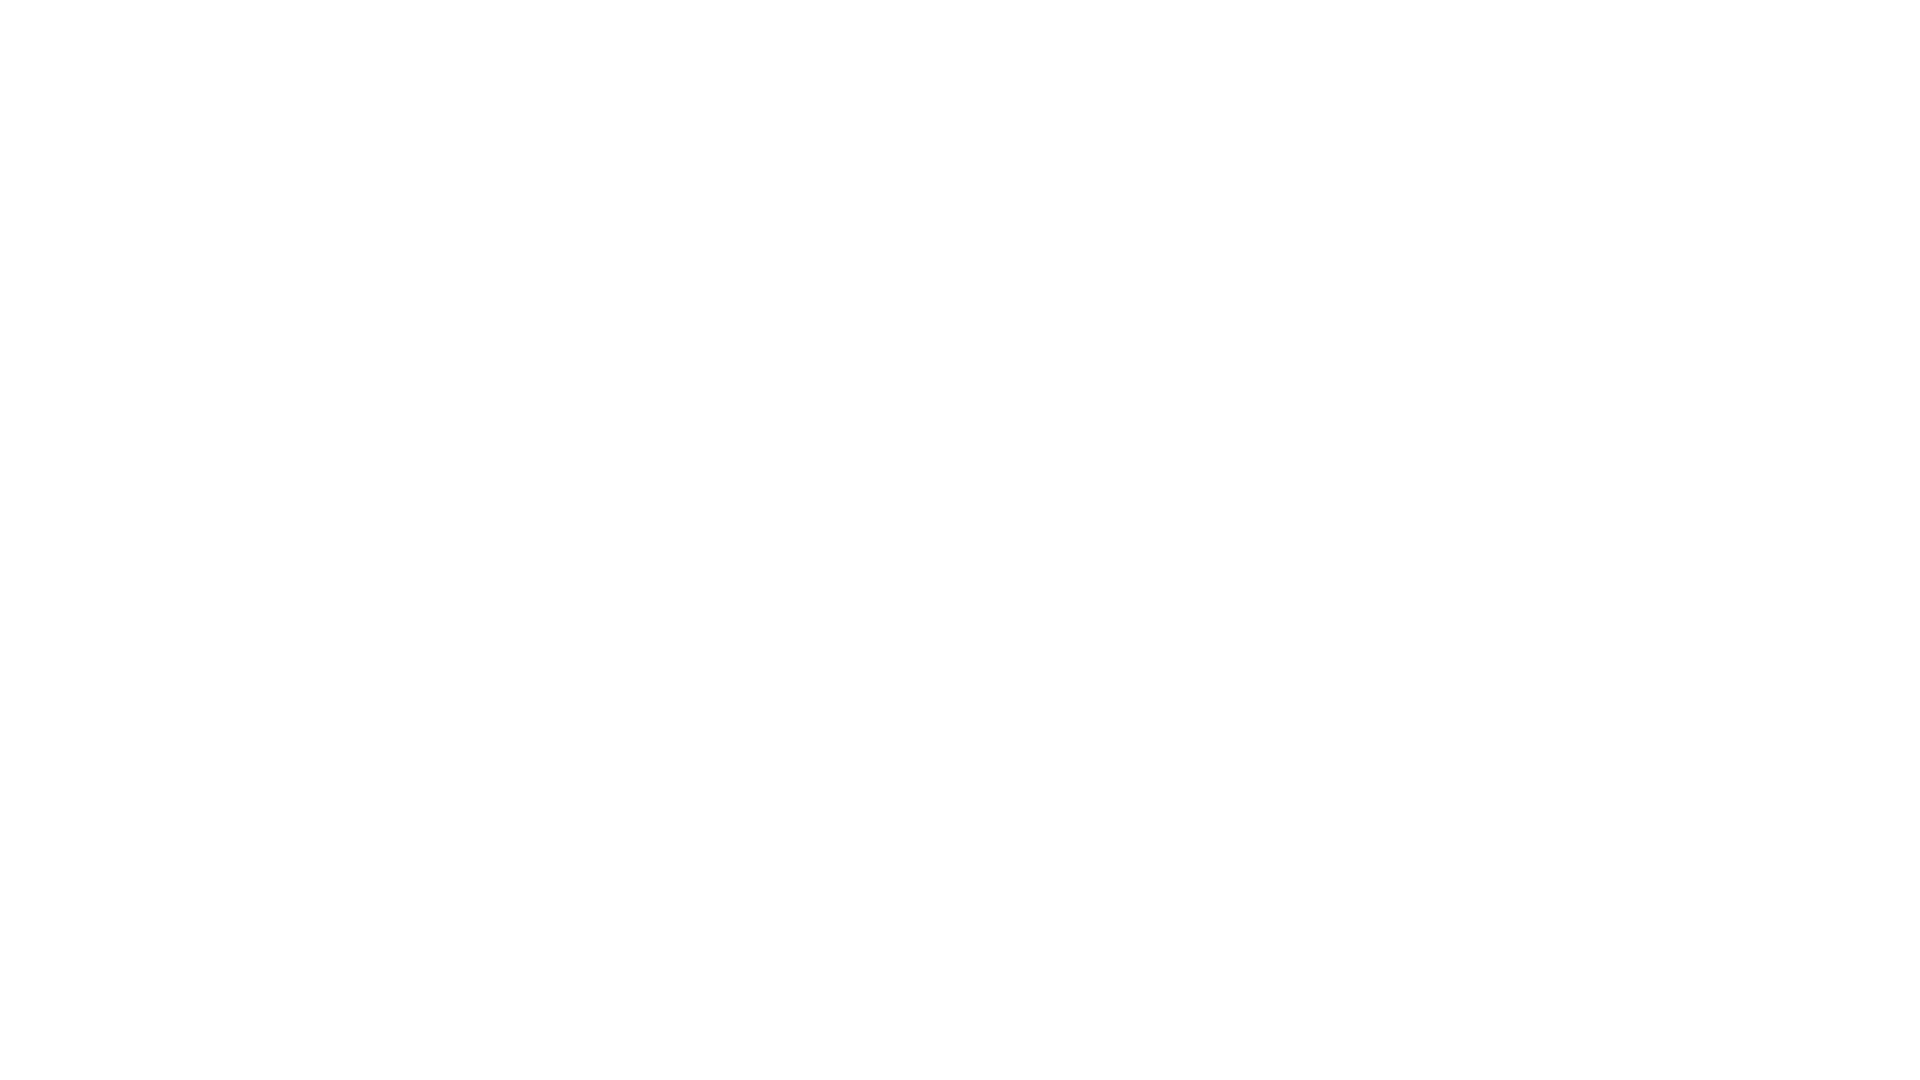

In [19]:
print(soup.prettify())

In [20]:
# finding the h1 tag 
soup.find_all("h1")

[<h1 class="companyListing__title">
 							List of companies in India
 						</h1>]

In [21]:
soup.find_all("h1")[0].text

'\n\t\t\t\t\t\t\tList of companies in India\n\t\t\t\t\t\t'

In [22]:
soup.find_all("h1")[0].text.strip()

'List of companies in India'

In [23]:
soup.find_all("h2")[0].text

'\n\t\t\t\t\t\t\t\t\t\tTCS\n\t\t\t\t\t\t\t\t\t'

In [35]:
for i in soup.find_all("h2"):
    if i.text.strip() in ["Companies by  Industry","Companies by  Locations","Companies by  Type","Companies by  Badges"]:
        pass
    else:
        print(i.text.strip())

TCS
Accenture
Cognizant
Wipro
ICICI Bank
HDFC Bank
Infosys
Capgemini
Tech Mahindra
HCLTech
Genpact
Axis Bank
Concentrix Corporation
Amazon
IBM
Reliance Jio
Larsen & Toubro Limited
HDB Financial Services
Reliance Retail
Teleperformance


In [70]:
len(soup.find_all("span",class_="companyCardWrapper__companyRatingValue"))

20

In [ ]:
companyCardWrapper__ActionCount

In [67]:
soup.find_all("span",class_="companyCardWrapper__ActionCount")

[<span class="companyCardWrapper__ActionCount">62.5k</span>,
 <span class="companyCardWrapper__ActionCount">758k</span>,
 <span class="companyCardWrapper__ActionCount">5.2k</span>,
 <span class="companyCardWrapper__ActionCount">45</span>,
 <span class="companyCardWrapper__ActionCount">25.5k</span>,
 <span class="companyCardWrapper__ActionCount">65</span>,
 <span class="companyCardWrapper__ActionCount">39.9k</span>,
 <span class="companyCardWrapper__ActionCount">511.6k</span>,
 <span class="companyCardWrapper__ActionCount">3.5k</span>,
 <span class="companyCardWrapper__ActionCount">13.3k</span>,
 <span class="companyCardWrapper__ActionCount">18.2k</span>,
 <span class="companyCardWrapper__ActionCount">33</span>,
 <span class="companyCardWrapper__ActionCount">36.4k</span>,
 <span class="companyCardWrapper__ActionCount">496.1k</span>,
 <span class="companyCardWrapper__ActionCount">3.1k</span>,
 <span class="companyCardWrapper__ActionCount">460</span>,
 <span class="companyCardWrapper__Act

In [53]:
company=soup.find_all("div",class_="companyCardWrapper")

In [54]:
len(company)

20

In [125]:
name=[]
rating=[]
review=[]
hq=[]
ctype=[]
old=[]
employee=[]
for i in company:
    name.append(i.find("h2").text.strip())
    rating.append(i.find_all("span",class_="companyCardWrapper__companyRatingValue")[0].text.strip())
    review.append(i.find("span",class_="companyCardWrapper__ActionCount").text.strip())
    hq.append(i.find_all("span",class_="companyCardWrapper__interLinking")[0].text.strip().split("|")[-1])
    ctype.append(i.find_all("span",class_="companyCardWrapper__interLinking")[0].text.strip().split("|")[2])
    old.append(i.find_all("span",class_="companyCardWrapper__interLinking")[0].text.strip().split("|")[3])
    employee.append(i.find_all("span",class_="companyCardWrapper__interLinking")[0].text.strip().split("|")[1]) 
    
    
    
d={"name":name,"rating":rating,"reviews":review,"type":ctype,"hq":hq,"old":old,"employee":employee}
df=pd.DataFrame(d)
df

,name,rating,reviews,type,hq,old,employee
0,TCS,3.8,62.5k,Public,Mumbai +281 more,55 years old,1 Lakh+ Employees
1,Accenture,4.1,39.9k,Public,Dublin +141 more,34 years old,1 Lakh+ Employees
2,Cognizant,3.9,36.4k,Forbes Global 2000,Teaneck. New Jersey. +111 more,29 years old,1 Lakh+ Employees
3,Wipro,3.8,33.1k,Public,Bangalore/Bengaluru +245 more,78 years old,1 Lakh+ Employees
4,ICICI Bank,4.0,29.5k,Public,Mumbai +1183 more,29 years old,1 Lakh+ Employees
5,HDFC Bank,3.9,29k,Public,Mumbai +1418 more,29 years old,1 Lakh+ Employees
6,Infosys,3.9,27.3k,Public,Bengaluru/Bangalore +135 more,42 years old,1 Lakh+ Employees
7,Capgemini,3.9,25.3k,Public,Paris +87 more,56 years old,1 Lakh+ Employees
8,Tech Mahindra,3.7,23.8k,Public,Pune +232 more,37 years old,1 Lakh+ Employees
9,HCLTech,3.7,23k,Public,Noida +153 more,32 years old,1 Lakh+ Employees


In [73]:
name

['TCS',
 'Accenture',
 'Cognizant',
 'Wipro',
 'ICICI Bank',
 'HDFC Bank',
 'Infosys',
 'Capgemini',
 'Tech Mahindra',
 'HCLTech',
 'Genpact',
 'Axis Bank',
 'Concentrix Corporation',
 'Amazon',
 'IBM',
 'Reliance Jio',
 'Larsen & Toubro Limited',
 'HDB Financial Services',
 'Reliance Retail',
 'Teleperformance']

In [77]:
rating

['3.8',
 '4.1',
 '3.9',
 '3.8',
 '4.0',
 '3.9',
 '3.9',
 '3.9',
 '3.7',
 '3.7',
 '4.0',
 '3.8',
 '3.9',
 '4.2',
 '4.1',
 '3.9',
 '4.0',
 '4.0',
 '3.9',
 '3.6']

In [78]:
review

['62.5k',
 '39.9k',
 '36.4k',
 '33.1k',
 '29.5k',
 '29k',
 '27.3k',
 '25.3k',
 '23.8k',
 '23k',
 '23k',
 '19.4k',
 '18.6k',
 '17.7k',
 '17.6k',
 '17.6k',
 '16.6k',
 '15.7k',
 '15.4k',
 '14.6k']

In [122]:
company[0].find_all("span",class_="companyCardWrapper__interLinking")[0].text.strip().split("|")[1]

' 1 Lakh+ Employees '

In [111]:
hq

[' Mumbai +281 more',
 ' Dublin +141 more',
 ' Teaneck. New Jersey. +111 more',
 ' Bangalore/Bengaluru +245 more',
 ' Mumbai +1183 more',
 ' Mumbai +1418 more',
 ' Bengaluru/Bangalore +135 more',
 ' Paris +87 more',
 ' Pune +232 more',
 ' Noida +153 more',
 ' New York +78 more',
 ' Mumbai +1218 more',
 ' Fremont +84 more',
 ' Seattle +393 more',
 ' Armonk +129 more',
 ' Navi Mumbai +1087 more',
 ' Mumbai +575 more',
 ' Ahmedabad +885 more',
 ' Navi Mumbai +892 more',
 ' Paris +126 more']

In [118]:
ctype

[' Public ',
 ' Public ',
 ' Forbes Global 2000 ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' Public ',
 ' 16 years old ',
 ' 17 years old ',
 ' Forbes Global 2000 ']

In [121]:
old

[' 55 years old ',
 ' 34 years old ',
 ' 29 years old ',
 ' 78 years old ',
 ' 29 years old ',
 ' 29 years old ',
 ' 42 years old ',
 ' 56 years old ',
 ' 37 years old ',
 ' 32 years old ',
 ' 26 years old ',
 ' 30 years old ',
 ' 40 years old ',
 ' 29 years old ',
 ' 112 years old ',
 ' 16 years old ',
 ' 85 years old ',
 ' Ahmedabad +885 more',
 ' Navi Mumbai +892 more',
 ' 45 years old ']

In [124]:
employee

[' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ',
 ' 1 Lakh+ Employees ',
 ' 50k-1 Lakh Employees ',
 ' 50k-1 Lakh Employees ',
 ' 10k-50k Employees ',
 ' 1 Lakh+ Employees ',
 ' 50k-1 Lakh Employees ',
 ' 50k-1 Lakh Employees ',
 ' 1 Lakh+ Employees ',
 ' 10k-50k Employees ',
 ' 1 Lakh+ Employees ',
 ' 10k-50k Employees ']

In [131]:
final=pd.DataFrame()
for j in range(1,5):
    url='https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page={}'.format(j)
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    webpage=requests.get(url,headers=headers).text
    soup=BeautifulSoup(webpage,"lxml")
    company=soup.find_all("div",class_="companyCardWrapper")
    
    name=[]
    rating=[]
    review=[]
    hq=[]
    ctype=[]
    old=[]
    employee=[]
    for i in company:
        name.append(i.find("h2").text.strip())
        rating.append(i.find_all("span",class_="companyCardWrapper__companyRatingValue")[0].text.strip())
        review.append(i.find("span",class_="companyCardWrapper__ActionCount").text.strip())
        hq.append(i.find_all("span",class_="companyCardWrapper__interLinking")[0].text.strip().split("|")[-1])
        ctype.append(i.find_all("span",class_="companyCardWrapper__interLinking")[0].text.strip().split("|")[2])
        old.append(i.find_all("span",class_="companyCardWrapper__interLinking")[0].text.strip().split("|")[3])
        employee.append(i.find_all("span",class_="companyCardWrapper__interLinking")[0].text.strip().split("|")[1]) 



    d={"name":name,"rating":rating,"reviews":review,"type":ctype,"hq":hq,"old":old,"employee":employee}
    df=pd.DataFrame(d)
    
    final=final.append(df,ignore_index=True)

<ipython-input-131-d2f83bbc4305>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final=final.append(df,ignore_index=True)
<ipython-input-131-d2f83bbc4305>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final=final.append(df,ignore_index=True)
<ipython-input-131-d2f83bbc4305>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final=final.append(df,ignore_index=True)


IndexError: list index out of range

In [130]:
final

,name,rating,reviews,type,hq,old,employee
0,TCS,3.8,62.5k,Public,Mumbai +281 more,55 years old,1 Lakh+ Employees
1,Accenture,4.1,39.9k,Public,Dublin +141 more,34 years old,1 Lakh+ Employees
2,Cognizant,3.9,36.4k,Forbes Global 2000,Teaneck. New Jersey. +111 more,29 years old,1 Lakh+ Employees
3,Wipro,3.8,33.1k,Public,Bangalore/Bengaluru +245 more,78 years old,1 Lakh+ Employees
4,ICICI Bank,4.0,29.5k,Public,Mumbai +1183 more,29 years old,1 Lakh+ Employees
5,HDFC Bank,3.9,29k,Public,Mumbai +1418 more,29 years old,1 Lakh+ Employees
6,Infosys,3.9,27.3k,Public,Bengaluru/Bangalore +135 more,42 years old,1 Lakh+ Employees
7,Capgemini,3.9,25.3k,Public,Paris +87 more,56 years old,1 Lakh+ Employees
8,Tech Mahindra,3.7,23.8k,Public,Pune +232 more,37 years old,1 Lakh+ Employees
9,HCLTech,3.7,23k,Public,Noida +153 more,32 years old,1 Lakh+ Employees
